In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# HW 3: SVM, KNN#

### 1. Load data

In [6]:
data = pd.read_csv('custom_dataset.csv')

X = data[['feature_1','feature_2']].to_numpy()
y = data['target'].to_numpy()

X, X_test, y, y_test = train_test_split(X, y, test_size=0.33)

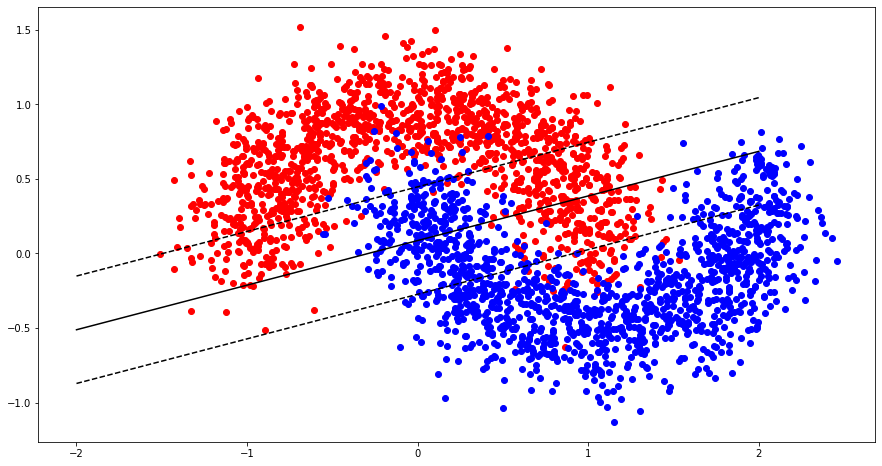

In [7]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)


w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (model.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(xx, yy, "k-")
ax.plot(xx, yy_down, "k--")
ax.plot(xx, yy_up, "k--")
colors = {0:'red', 1:'blue'}
for key, value in colors.items():   
    ax.scatter(X[y==key, 0], X[y==key, 1], c=value, label=key)
plt.axis('tight')

plt.show()

In [ ]:
## Ширина полосы

In [24]:
margin

0.34511135974225227

### Оценка модели svm с линейным ядром:

In [9]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

0.14201183431952663

##KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)
mean_squared_error(predictions, y_test)

0.04215976331360947

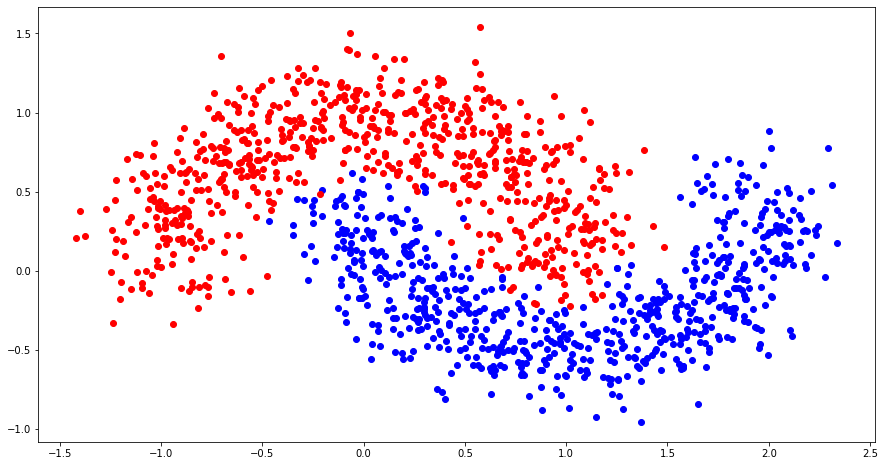

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colors = {0:'red', 1:'blue'}
for x, color in zip(X_test, predictions):   
    ax.scatter(x[0], x[1], c=colors[color])
plt.axis('tight')
plt.show()

по mean_squared_error и графикам очевидно что knn модель намного более точная, но это и очевидно, учитывя вид датасета - его невозможно нормально аппроксимировать линейной моделью (в нашем случае, svm с линейным ядром)